# Classification

# KNN algorithm

In [27]:
import pandas as pd
df=pd.read_csv('tshirt.csv')
df

,Height,Width,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  18 non-null     int64 
 1   Width   18 non-null     int64 
 2   Size    18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [29]:
df=pd.get_dummies(df,drop_first=True)
df

,Height,Width,Size_M
0,158,58,1
1,158,59,1
2,158,63,1
3,160,59,1
4,160,60,1
5,163,60,1
6,163,61,1
7,160,64,0
8,163,64,0
9,165,61,0


In [30]:
y=df['Size_M']
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: Size_M, dtype: uint8

In [31]:
x=df.drop('Size_M',axis=1)
x

,Height,Width
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
nn=KNeighborsClassifier(n_neighbors=3)
model=nn.fit(x,y)
y_pred=model.predict(x)
print(y_pred)

[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [65]:
y_pred=model.predict([[161,61]])
print(y_pred)

[1]


In [66]:
y_pred=model.predict(x)
print(y_pred)
dif=pd.DataFrame({'Actual':y,'Predicated':y_pred})
dif

[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


,Actual,Predicated
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


In [67]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y,y_pred)
print("acs :" , acs)

acs : 1.0


In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[11,  0],
       [ 0,  7]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
print("error :" ,1-acs)

error : 0.0


In [70]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

In [71]:
print("sensitivity :" ,TP / (TP+FN))

sensitivity : 1.0


In [72]:
print("specificity :" ,TN / (TN+FP))

specificity : 1.0


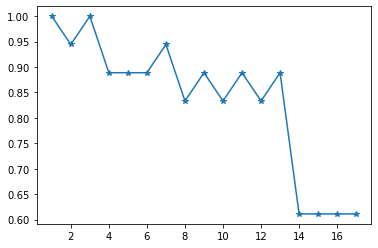

In [75]:
import matplotlib.pyplot as plt
k=[]
for i in range(1,18):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x,y)
    y_pred=model.predict(x)
#     print(y_pred)
    acc=accuracy_score(y,y_pred)
    k.append(acc)
plt.plot(range(1,18),k,marker='*')    
plt.show()
    
    